<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_HR_gr2/blob/Kulinichenko-Alexander-folder/%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5_2_%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D0%B0_01_04_2023_%D0%9A%D1%83%D0%BB%D0%B8%D0%BD%D0%B8%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B1%D0%B0%D0%B7%D1%8B_17_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Работа с массивами данных
import numpy as np 

# Работа с табличными данными
import pandas as pd

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Масштабирование данных
from sklearn.preprocessing import StandardScaler

# Загрузка датасетов из облака google
import gdown

# Регулярные выражения
import re

# Отрисовка графиков
import matplotlib.pyplot as plt

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

#Изучение датасета

In [71]:

# Загрузка файла из облака в colab
pact_file = "https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_HR/datasets/%D0%94%D0%B0%D1%82%D0%B0%D0%A1%D0%B5%D1%82%20%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5%20581%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5.xlsx"
gdown.download(pact_file, None, quiet=True)
data_xsl = pd.read_excel(pact_file, sheet_name='Лист1')
data_xsl.head()

,Unnamed: 0,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,0,2023-02-23 00:00:00,Bessonova Mariya,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да
1,1,2023-01-11 00:00:00,Ефремова Екатерина Вячеславовна,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да
2,2,2023-02-27 00:00:00,Фролов Артур Михайлович,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,Директор по маркетингу и бренд-менеджер,"Высшее, 2013, Санкт-Петербургский государствен...",28 февраля 2023 в 09:41,да
3,3,2023-01-11 00:00:00,Хозаев Расул Шагаманович,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),"Магистр, 2014, Московский государственный техн...",24 января 2023 в 12:07,да
4,4,2023-01-11 00:00:00,Шадрин Олег Михайлович,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,"Высшее, 2021, Российская академия народного хо...",6 февраля 2023 в 11:18,да


In [ ]:
#количество строк и столбцов
data_xsl.shape

(579, 15)

In [ ]:
data_xsl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Unnamed: 0                       579 non-null    int64 
 1   Дата отклика                     579 non-null    object
 2   ФИО                              579 non-null    object
 3   Пол, возраст                     579 non-null    object
 4   ЗП                               579 non-null    object
 5   Ищет работу на должность         579 non-null    object
 6   Город                            579 non-null    object
 7   Занятость                        579 non-null    object
 8   График                           579 non-null    object
 9   Опыт ()                          579 non-null    object
 10  Последнее/нынешное место работы  579 non-null    object
 11  Последняя/нынешняя должность     579 non-null    object
 12  Образование и ВУЗ                579

In [ ]:
print(data_xsl.isna().sum())

Unnamed: 0                          0
Дата отклика                        0
ФИО                                 0
Пол, возраст                        0
ЗП                                  0
Ищет работу на должность            0
Город                               0
Занятость                           0
График                              0
Опыт ()                             0
Последнее/нынешное место работы     0
Последняя/нынешняя должность        0
Образование и ВУЗ                   0
Обновление резюме                   0
Подходит - да/нет                  79
dtype: int64


##Предварительные выводы:
0. Номер по порядку
1. дата отклика
2. ФИО
3. Пол, возраст.  ЗАМЕЧАНИЕ: Не у всех заполнен возраст и дата рождения
4. ЗП. ЗАМЕЧАНИЕ: У некоторых не указана. Есть в различной валюте
5. Ищет работу на должность. ЗАМЕЧАНИЕ: Всего 8 позиций
6. Город. ЗАМЕЧАНИЕ: У некоторых всесто города указана страна. так же в этом поле инвормация готов, неготов к переезду, командировкам
7. Занятость. ЗАМЕЧАНИЕ: Всего 20 разновидностей заполнения (из 5 возможных)типа: полная занятость, частичная занятость, проектная работа, стажировка, волонтерство
8. График.  ЗАМЕЧАНИЕ: Всего 30 вариантов заполнения ( из 5 возможных) типа вахтовый метод, удаленная работа (удаленная), гибкий график, полный день, сменный график. Также ошибки типа: "сменный графи", "удаленная работа\n\n". Из за чего увеличиваются варианты заполнения.
9. Опыт (). ЗАМЕЧАНИЕ: указывается количество лет и месяцев
10. Последнее/нынешное место работы. 
11. Последняя/нынешняя должность.
12. Образование и ВУЗ. Замечание Образование (12 вариантов есть повторяющиеся)
13. Обновление резюме.
14. Подходит - да/нет.  ЗАМЕЧАНИЕ: Да - 11, НЕТ - 489, Не запполнено - 79. По данному столбцу база разбалансировна.

В техническом задании есть ссылки на блоки “Ключевые навыки”, “Опыт работы”, “Обо мне”, которые отсутствуют в исходной базе данных. 

In [ ]:
#data_xsl_ = data_xsl.groupby(['Ищет работу на должность']).count()
#data_xsl_ = data_xsl.groupby(['ЗП']).count()
data_xsl_ = data_xsl.groupby(['Занятость']).count()
#data_xsl_ = data_xsl.groupby(['График']).count()
#data_xsl_ = data_xsl.groupby(['Опыт ()']).count()
#data_xsl_ = data_xsl.groupby(['Последняя/нынешняя должность']).count()
#data_xsl_ = data_xsl.groupby(['Подходит - да/нет']).count()
data_xsl_

,Unnamed: 0,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
Занятость,,,,,,,,,,,,,,
полная занятость,342,342,342,342,342,342,342,342,342,342,342,342,342,300
"полная занятость, проектная работа",8,8,8,8,8,8,8,8,8,8,8,8,8,7
"полная занятость, стажировка",1,1,1,1,1,1,1,1,1,1,1,1,1,0
"полная занятость, частичная занятость",22,22,22,22,22,22,22,22,22,22,22,22,22,22
"полная занятость, частичная занятость, проектная работа",14,14,14,14,14,14,14,14,14,14,14,14,14,11
"полная занятость, частичная занятость, проектная работа, волонтерство",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"полная занятость, частичная занятость, проектная работа, стажировка",4,4,4,4,4,4,4,4,4,4,4,4,4,1
проектная работа,2,2,2,2,2,2,2,2,2,2,2,2,2,0
"проектная работа, волонтерство, частичная занятость, полная занятость",1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
data_xsl.describe(include=['O'])

,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
count,579,579,579,579,579,579,579,579,579,579,579,579,579,500
unique,89,507,443,44,8,209,20,30,252,486,358,488,547,2
top,2023-02-22 00:00:00,ФИО скрыто соискателем,Женщина,не указана,Growth Product Manager,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —6 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product manager,Среднее образование,31 января 2023 в 09:52,нет
freq,48,7,41,288,198,69,342,202,10,12,42,15,3,489


# Изменение базы (удаление лишних символов, приведение к нижнему регистру)

In [72]:
data_xsl = data_xsl.drop(data_xsl.columns[0],axis = 1) # Убираем первый столбец с продублированными индексами. Он нам не нужен

In [73]:

# Замена концов строк на пробелы, удаление символа с кодом 0xA0
# обрезка краевых пробелов, приведение к нижнему регистру
def purify(x):
    if isinstance(x, str):                # Если значение - строка:
        x = x.replace('\n', ' ').replace('\xa0', '').strip().lower()
    return x

data_xsl = data_xsl.applymap(purify)
data_xsl.head()              

,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,2023-02-23 00:00:00,bessonova mariya,женщина,90 000 руб.,growth product manager,"индонезия, не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,опыт работы —5 лет 10 месяцев,pt mybali app group,менеджер по продукту,"высшее, 2023, нетоло́гия, 2014, университет ро...",23 февраля 2023 в 16:30,да
1,2023-01-11 00:00:00,ефремова екатерина вячеславовна,женщина,не указана,growth product manager,"москва, готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",опыт работы —11 лет 11 месяцев,банк открытие,product owner трайб сбережения и инвестиции,"высшее, 2022, geekbrains, 2010, московский худ...",8 февраля 2023 в 09:15,да
2,2023-02-27 00:00:00,фролов артур михайлович,"мужчина, 33 года, родился 23 августа 1989",150 000 руб.,growth product manager,"санкт-петербург, готов к переезду: москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",опыт работы —7 лет 2 месяца,dikiy llc,директор по маркетингу и бренд-менеджер,"высшее, 2013, санкт-петербургский государствен...",28 февраля 2023 в 09:41,да
3,2023-01-11 00:00:00,хозаев расул шагаманович,"мужчина, 32 года, родился 7 декабря 1990",не указана,growth product manager,"москва, м. молодежная, хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",опыт работы —8 лет 10 месяцев,weinvest,product manager (team leader),"магистр, 2014, московский государственный техн...",24 января 2023 в 12:07,да
4,2023-01-11 00:00:00,шадрин олег михайлович,"мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,growth product manager,"пермь, хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",опыт работы —5 лет 9 месяцев,индивидуальное предпринимательство / частная п...,product/project manager,"высшее, 2021, российская академия народного хо...",6 февраля 2023 в 11:18,да


# Проверка базы

In [42]:
# Разбор значений пола (вариант от елены соколовой измененный для проверки если нет указания на мужчина это или женщина)
def extract_gender(arg):
    if 'женщина' in arg.lower():
        return 0
    elif 'мужчина' in arg.lower():
        return 1
    else:
        return "2"    # указатель что не указано мужчина или женщина 

columns =['Пол', 'возраст']
data_clean = pd.DataFrame(data=None, index=None, columns=columns, dtype=None)
data_clean['Пол'] = data_xsl['Пол, возраст'].apply(extract_gender)

#data_clean
data_clean['Пол'].value_counts()  
#Если нет двоек то все хорошо


1    302
0    277
Name: Пол, dtype: int64

In [43]:
# Разбор значений возраста ( эта часть функции из раздела Парсинг базы выбирает только вохраст)

base_update_year = 2023

def extract_age_years(arg):
    # Ожидается, что значение содержит "мужчина" или "женщина"
    # Если "мужчина" - результат 1., иначе 0.
    #sex = 1. if 'муж' in arg else 0.

    try:
        # Выделение года и вычисление возраста
        years = base_update_year - int(re.search(r'\d{4}', arg)[0])

    except (IndexError, TypeError, ValueError):
        # В случае ошибки год равен 0
        years = 0

    return years

#columns =['Пол', 'возраст']
#data_clean = pd.DataFrame(data=None, index=None, columns=columns, dtype=None)
data_clean['возраст'] = data_xsl['Пол, возраст'].apply(extract_age_years)

#data_clean
#data_clean['возраст'].value_counts()
data_clean.agg(['sum', 'mean', 'min', 'max'])

,Пол,возраст
sum,302.000000,16892.000000
mean,0.521589,29.174439
min,0.000000,0.000000
max,1.000000,60.000000


In [44]:
# Разбор значений возраста (2 вариает)
def extract_age(arg):
    year_key_words = ['год', 'лет', 'года']
    args_splited = arg.split(',')[:2]
    if len(args_splited) > 1:
        year = int(re.findall(r'\d+', args_splited[1])[0])
    else:
        year = 0
    return year

    
data_clean['возраст2'] = data_xsl['Пол, возраст'].apply(extract_age)
#data_clean['возраст2'].value_counts()
data_clean.agg(['sum', 'mean', 'min', 'max'])
# !!! Подсчет возраста отличается

,Пол,возраст,возраст2
sum,302.000000,16892.000000,16475.000000
mean,0.521589,29.174439,28.454231
min,0.000000,0.000000,0.000000
max,1.000000,60.000000,60.000000


In [45]:
# Курсы валют для зарплат
currency_rate = {'руб'    : 1.,
                 'usd'    : 65.,
                 'kzt'    : 0.17,
                 'грн'    : 2.6,
                 'белруб' : 30.5,
                 'eur'    : 70.,
                 'kgs'    : 0.9,
                 'сум'    : 0.007,
                 'azn'    : 37.5
                }

# Разбор значения зарплаты
#!!! (данная функция есть в главе "Парсинг базы")
def extract_salary_test(arg):
    num = arg
    # Сначала получаем чистое число, убираем лишние знаки
    if (type(num) == str):
        num = re.sub(' ','',num)
        num = re.sub('[а-яА-ЯёЁ]','',num)
        num = re.sub('[a-zA-Z]','',num)
        num = num.replace('.','')
        try:
            # Выделение числа и преобразование к float
            num = float(re.search(r'\d+', num)[0])

            # Поиск символа валюты в строке, и, если найдено,
            # приведение к рублю по курсу валюты
            for currency, rate in currency_rate.items():
                if currency in arg :
                    num *= rate
                    break
            else:
                print("Неизвестная валюта:", arg) 

        except TypeError:
            # Если не получилось выделить число - вернуть 0
            num = 0.

    return round(num / 1000, 0)                  # В тысячах рублей

data_clean['ЗП'] = data_xsl['ЗП'].apply(extract_salary_test) 
#data_clean
#data_clean['ЗП'].value_counts()
data_clean.agg(['sum', 'mean', 'min', 'max'])   

,Пол,возраст,возраст2,ЗП
sum,302.000000,16892.000000,16475.000000,24782.000000
mean,0.521589,29.174439,28.454231,42.801382
min,0.000000,0.000000,0.000000,0.000000
max,1.000000,60.000000,60.000000,350.000000


In [ ]:
#Находим все варианты валют столбце ЗП
unique_currency = []

i=0
for i in range(data_xsl.shape[0]): # По всему столбцу резюме
    if type(data_xsl.loc[i, 'ЗП'])!=float:
        values = data_xsl.loc[i, 'ЗП']
        values = values.split(",")
        for value in values:
            value = re.sub(' ','',value)
            value = re.sub('[0-9]','',value)
            value = value.strip()
            if value not in unique_currency:
                unique_currency.append(value)

print(unique_currency)
print(len(unique_currency))	



['руб.', 'неуказана', 'kzt', 'usd', 'eur', 'руб', 'kgs']
7


In [ ]:
#Находим все варианты в столбце Ищет работу на должность
unique_job_title = []

i=0
for i in range(data_xsl.shape[0]): # По всему столбцу резюме
    if type(data_xsl.loc[i, 'Ищет работу на должность'])!=float:
        values = data_xsl.loc[i, 'Ищет работу на должность']
        values = values.split(",")
        for value in values:
            value = value.strip()
            if value not in unique_job_title:
                unique_job_title.append(value)

print(unique_job_title)
print(len(unique_job_title))	

['growth product manager', 'product manager в growth hacking команду', 'директор медицинской клиники', 'hr-специалист', 'product manager в команду финансового департамента', 'product manager в команду hr', 'project manager', 'product marketing manager в growth hacking команду']
8


In [ ]:
#Находим все варианты в столбце Занятость
unique_employment = []

i=0
for i in range(data_xsl.shape[0]): # По всему столбцу резюме
    if type(data_xsl.loc[i, 'Занятость'])!=float:
        values = data_xsl.loc[i, 'Занятость']
        values = values.split(",")
        for value in values:
            value = value.strip()
            if value not in unique_employment:
                unique_employment.append(value)

print(unique_employment)
print(len(unique_employment))

['проектная работа', 'частичная занятость', 'полная занятость', 'стажировка', 'волонтерство', 'неполный рабочий день', 'полный рабочий день']
7


In [ ]:
#Находим все варианты в столбце График
unique_schedule = []

i=0
for i in range(data_xsl.shape[0]): # По всему столбцу резюме
    if type(data_xsl.loc[i, 'График'])!=float:
        values = data_xsl.loc[i, 'График']
        values = values.split(",")
        for value in values:
            value = value.strip()
            if value not in unique_schedule:
                unique_schedule.append(value)

print(unique_schedule)
print(len(unique_schedule))

['удаленная работа', 'гибкий график', 'полный день', 'сменный график', 'вахтовый метод', 'полный рабочий день', 'удаленная', 'сменный графи']
8


In [ ]:
#Находим все варианты образования в столбце Образование и ВУЗ 
unique_education = []

i=0
for i in range(data_xsl.shape[0]): # По всему столбцу резюме
    if type(data_xsl.loc[i, 'Образование и ВУЗ'])!=float:
        values = data_xsl.loc[i, 'Образование и ВУЗ']
        values = values.split(",")[0]
        values = values.strip()
        if values not in unique_education:
            unique_education.append(values)

print(unique_education)
print(len(unique_education))



['высшее', 'магистр', 'среднее специальное', 'бакалавр', 'неоконченное высшее', 'доктор наук', 'кандидат наук', 'среднее образование', 'среднее специальное образование', 'незаконченное высшее образование', 'высшее образование', 'среднее']
12


In [ ]:
#Находим все варианты городов, стран (первое вхождение) в столбце Город
unique_city = []
millionCities_lst = "Москва, Санкт-Петербург, Новосибирск, Екатеринбург, Нижний Новгород, Казань, Челябинск, Омск, Самара, Ростов-на-Дону, Уфа, Красноярск, Пермь, Воронеж, Волгоград,"
i=0
for i in range(data_xsl.shape[0]): # По всем резюме
    if type(data_xsl.loc[i, 'Город'])!=float:
        values = data_xsl.loc[i, 'Город']
        values = values.split(",")[0]
        values = values.strip()
        if values not in millionCities_lst.lower():
           if values not in unique_city:
                unique_city.append(values)

unique_city.sort()
print(unique_city)
print(len(unique_city))

['актау', 'алматы', 'армения', 'астана', 'астрахань', 'батуми', 'бишкек', 'брянск', 'германия', 'ижевск', 'израиль', 'индия', 'индонезия', 'иркутск', 'йошкар-ола', 'караганда', 'кемерово', 'киров (кировская область)', 'кишинёв', 'кострома', 'краснодар', 'кумертау', 'магнитогорск', 'минск', 'мурманск', 'набережные челны', 'оаэ', 'октябрьский (республика башкортостан)', 'саратов', 'саров', 'сербия', 'сочи', 'стерлитамак', 'таиланд', 'ташкент', 'тбилиси', 'тольятти', 'томск', 'тула', 'турция', 'тюмень', 'ульяновск', 'щелково', 'энгальс', 'ярославль']
45


In [ ]:
#Находим все варианты командировок, перездов (второе вхождение) в столбце Город
unique_business_trips = []

i=0
for i in range(data_xsl.shape[0]): # По всему столбцу резюме
    if type(data_xsl.loc[i, 'Город'])!=float:
        values = data_xsl.loc[i, 'Город']
        values = values.split(",")[1:]
        for value in values:
            value = value.strip()
            if value not in unique_business_trips:
                unique_business_trips.append(value)

unique_business_trips.sort()
print(unique_business_trips)
print(len(unique_business_trips))

['', 'австралия', 'австрия', 'азербайджан', 'албания', 'алжир', 'андорра', 'аргентина', 'армения', 'астана', 'астраханская область', 'багамские острова', 'баку', 'бангладеш', 'бахрейн', 'бельгия', 'бишкек', 'болгария', 'босния и герцеговина', 'бразилия', 'великобритания', 'венгрия', 'венесуэла', 'владивосток', 'вьетнам', 'германия', 'готов к деловым поездкам', 'готов к командировкам', 'готов к переезду', 'готов к переезду: абхазия', 'готов к переезду: алматы', 'готов к переезду: беларусь', 'готов к переезду: другие регионы', 'готов к переезду: израиль', 'готов к переезду: кипр', 'готов к переезду: китай', 'готов к переезду: кыргызстан', 'готов к переезду: москва', 'готов к переезду: нидерланды', 'готов к переезду: оаэ', 'готов к переезду: республика крым', 'готов к переезду: россия', 'готов к переезду: санкт-петербург', 'готов к переезду: симферополь', 'готов к переезду: сша', 'готов к переезду: тбилиси', 'готов к переезду: ярославль', 'готов к редким командировкам', 'готова к командир

# Классификаторы (списки, словари)

In [74]:
### Параметрические данные для функций разбора ###

# Курсы валют для зарплат
currency_rate = {'руб'    : 1.,
                 'usd'    : 65.,
                 'kzt'    : 0.17,
                 'грн'    : 2.6,
                 'белруб' : 30.5,
                 'eur'    : 70.,
                 'kgs'    : 0.9,
                 'сум'    : 0.007,
                 'azn'    : 37.5
                }

# Списки и словари для разбиения на классы
# Для ускорения работы добавлен счетчик классов, который будет вычислен ниже

# Список порогов возраста
age_class = [0, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]

# Список порогов опыта работы в месяцах
experience_class = [0, [7, 13, 25, 37, 61, 97, 121, 157, 193, 241]]

# Классы городов
city_class = [0, 
              {'германия'        : 0,
               'израиль'         : 0,
               'индия'           : 0,
               'индонезия'       : 0,
               'оаэ'             : 0,
               'сербия'          : 0,
               'таиланд'         : 0,
               'турция'          : 0,
               'актау'           : 1,
               'алматы'          : 1,
               'армения'         : 1,
               'астана'          : 1,
               'батуми'          : 1,
               'бишкек'          : 1,
               'караганда'       : 1,
               'кишинёв'         : 1,
               'минск'           : 1,
               'ташкент'         : 1,
               'тбилиси'         : 1,
               'москва'          : 2,
               'санкт-петербург' : 3,
               'новосибирск'     : 4,
               'екатеринбург'    : 4,
               'нижний новгород' : 4,
               'казань'          : 4,
               'челябинск'       : 4,
               'омск'            : 4,
               'самара'          : 4,
               'ростов-на-дону'  : 4,
               'уфа'             : 4,
               'красноярск'      : 4,
               'пермь'           : 4,
               'воронеж'         : 4,
               'волгоград'       : 4,
               'прочие города'   : 5
              }]

# Классы занятости
employment_class = [0, 
                    {'стажировка'          : 0,
                     'частичная занятость' : 1,
                     'неполный рабочий день' : 1,
                     'проектная работа'    : 2,
                     'полная занятость'    : 3,
                     'полный рабочий день' : 3,
                     'волонтерство'        : 4,
                    }]

# Классы графика работы
schedule_class = [0, 
                  {'гибкий график'         : 0,
                   'полный день'           : 1,
                   'полный рабочий день'   : 1,
                   'сменный график'        : 2,
                   'сменный'               : 2,
                   'удаленная работа'      : 3,
                   'удаленная'             : 3,
                   'вахтовый метод'        : 4
                  }]

# Классы образования
education_class = [0,
                   {'доктор наук'          : 0,
                    'кандидат наук'        : 0,
                    'высшее образование'   : 1,
                    'higher education'     : 1,
                    'высшее'               : 1,
                    'магистр'              : 1,
                    'бакалавр'             : 1,
                    'незаконченное высшее образование'  : 2,
                    'неоконченное высшее'  : 2,
                    'среднее специальное'  : 3,
                    'среднее специальное образование'  : 3,
                    'среднее            '  : 4,
                    'среднее образование'  : 4
                   }]


# Парсинг базы

In [75]:
data_xsl['Подходит - 1/0'] = data_xsl['Подходит - да/нет'].apply(lambda x: 0 if x == 'нет' else 1)

In [76]:
data_xsl.head() 

,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет,Подходит - 1/0
0,2023-02-23 00:00:00,bessonova mariya,женщина,90 000 руб.,growth product manager,"индонезия, не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,опыт работы —5 лет 10 месяцев,pt mybali app group,менеджер по продукту,"высшее, 2023, нетоло́гия, 2014, университет ро...",23 февраля 2023 в 16:30,да,1
1,2023-01-11 00:00:00,ефремова екатерина вячеславовна,женщина,не указана,growth product manager,"москва, готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",опыт работы —11 лет 11 месяцев,банк открытие,product owner трайб сбережения и инвестиции,"высшее, 2022, geekbrains, 2010, московский худ...",8 февраля 2023 в 09:15,да,1
2,2023-02-27 00:00:00,фролов артур михайлович,"мужчина, 33 года, родился 23 августа 1989",150 000 руб.,growth product manager,"санкт-петербург, готов к переезду: москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",опыт работы —7 лет 2 месяца,dikiy llc,директор по маркетингу и бренд-менеджер,"высшее, 2013, санкт-петербургский государствен...",28 февраля 2023 в 09:41,да,1
3,2023-01-11 00:00:00,хозаев расул шагаманович,"мужчина, 32 года, родился 7 декабря 1990",не указана,growth product manager,"москва, м. молодежная, хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",опыт работы —8 лет 10 месяцев,weinvest,product manager (team leader),"магистр, 2014, московский государственный техн...",24 января 2023 в 12:07,да,1
4,2023-01-11 00:00:00,шадрин олег михайлович,"мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,growth product manager,"пермь, хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",опыт работы —5 лет 9 месяцев,индивидуальное предпринимательство / частная п...,product/project manager,"высшее, 2021, российская академия народного хо...",6 февраля 2023 в 11:18,да,1


In [77]:
COL_SEX_AGE     = data_xsl.columns.get_loc('Пол, возраст')
COL_SALARY      = data_xsl.columns.get_loc('ЗП')
COL_POS_SEEK    = data_xsl.columns.get_loc('Ищет работу на должность')
COL_CITY        = data_xsl.columns.get_loc('Город')
COL_EMPL        = data_xsl.columns.get_loc('Занятость')
COL_SCHED       = data_xsl.columns.get_loc('График')
COL_EXP         = data_xsl.columns.get_loc('Опыт ()')
COL_POS_PREV    = data_xsl.columns.get_loc('Последнее/нынешное место работы')
COL_POS_JOB     = data_xsl.columns.get_loc('Последняя/нынешняя должность')
COL_EDU         = data_xsl.columns.get_loc('Образование и ВУЗ')
COL_UPDATED     = data_xsl.columns.get_loc('Обновление резюме')
COL_FITS        = data_xsl.columns.get_loc('Подходит - 1/0')    # Результат



In [78]:
# Выделение подстроки вида ДД.ММ.ГГГГ и возвращение значения года
def extract_year(x):
    try: 
        return int(re.search(r'\d\d.\d\d.(\d{4})', x)[1])   # Ожидается строка вида 'dd.mm.yyyy ...'
  
    except (IndexError, TypeError, ValueError):
        return 0 
            

In [79]:
# Вычисление счетчиков для данных разбиения

for class_desc in [age_class,
                   experience_class,
                   city_class,
                   employment_class,
                   schedule_class,
                   education_class]:
    if isinstance(class_desc[1], list):
        class_desc[0] = len(class_desc[1]) + 1
    else:
        class_desc[0] = max(class_desc[1].values()) + 1

In [80]:
# Получение one hot encoding представления значения класса
 
def int_to_ohe(arg, class_list):
  
    # Определение размерности выходного вектора
    num_classes = class_list[0]

    # Поиск верного интервала для входного значения
    for i in range(num_classes - 1):
        if arg < class_list[1][i]:
            cls = i                       # Интервал найден - назначение класса
            break
    else:                                 # Внимание: for/else
        cls = num_classes - 1             # Интервал не найден - последний класс

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(cls, num_classes)

In [81]:
# Общая функция преобразования строки к multi-вектору
# На входе данные и словарь сопоставления подстрок классам

def str_to_multi(arg, class_dict):
    # Определение размерности выходного вектора
    num_classes = class_dict[0]

    # Создание нулевого вектора
    result = np.zeros(num_classes)
    
    # Поиск значения в словаре и, если найдено,
    # выставление 1. на нужной позиции
    for value, cls in class_dict[1].items():
        if value in arg:
            result[cls] = 1.

    return result

In [82]:
# Разбор значений пола, возраста

base_update_year = 2023

def extract_sex_age_years(arg):
    # Ожидается, что значение содержит "мужчина" или "женщина"
    # Если "мужчина" - результат 1., иначе 0.
    sex = 1. if 'муж' in arg else 0.

    try:
        # Выделение года и вычисление возраста
        years = base_update_year - int(re.search(r'\d{4}', arg)[0])

    except (IndexError, TypeError, ValueError):
        # В случае ошибки год равен 0
        years = 0

    return sex, years


In [83]:
# Преобразование значения возраста в one hot encoding

def age_years_to_ohe(arg):
    return int_to_ohe(arg, age_class)

In [84]:
# Преобразование данных об опыте работы в one hot encoding

def experience_months_to_ohe(arg):
    return int_to_ohe(arg, experience_class)

In [85]:
# Разбор значения зарплаты 
#!!! (данная функция есть в главе "Проверка базы")

def extract_salary(arg):
    num = arg
    # Сначала получаем чистое число, убираем лишние знаки
    if (type(num) == str):
        num = re.sub(' ','',num)
        num = re.sub('[а-яА-ЯёЁ]','',num)
        num = re.sub('[a-zA-Z]','',num)
        num = num.replace('.','')
        try:
            # Выделение числа и преобразование к float
            num = float(re.search(r'\d+', num)[0])

            # Поиск символа валюты в строке, и, если найдено,
            # приведение к рублю по курсу валюты
            for currency, rate in currency_rate.items():
                if currency in arg :
                    num *= rate
                    break
            else:
                print("Неизвестная валюта:", arg) 

        except TypeError:
            # Если не получилось выделить число - вернуть 0
            num = 0.

    return round(num / 1000, 0)                  # В тысячах рублей


In [86]:
# Разбор данных о городe и преобразование в one hot encoding

def extract_city_to_ohe(arg):
    # Определение размерности выходного вектора
    num_classes = city_class[0]

    # Разбивка на слова
    split_array = re.split(r'[ ,.:()?!]', arg)

    # Поиск города в строке и присвоение ему класса
    for word in split_array:
        city_cls = city_class[1].get(word, -1)
        if city_cls >= 0:
            break
    else:                                 # Внимание: for/else
        # Город не в city_class - значит его класс "прочие города"
        city_cls = num_classes - 1

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(city_cls, num_classes)

In [87]:
# Разбор данных о желаемой занятости и преобразование в multi

def extract_employment_to_multi(arg):
    return str_to_multi(arg, employment_class)

In [88]:
# Разбор данных о желаемом графике работы и преобразование в multi

def extract_schedule_to_multi(arg):
    return str_to_multi(arg, schedule_class)

In [89]:
# Разбор данных об образовании и преобразование в multi

def extract_education_to_multi(arg):
    result = str_to_multi(arg, education_class)
    
    # Поправка: неоконченное высшее не может быть одновременно с высшим
    if result[2] > 0.:
        result[1] = 0.
    
    return result

In [90]:
# Разбор данных об опыте работы - результат в месяцах

def extract_experience_months(arg):
    try:
        # Выделение количества лет, преобразование в int
        years = int(re.search(r'(\d+)\s+(год.?|лет)', arg)[1])

    except (IndexError, TypeError, ValueError):
        # Неудача - количество лет равно 0
        years = 0
    
    try:
        # Выделение количества месяцев, преобразование в int
        months = int(re.search(r'(\d+)\s+месяц', arg)[1])

    except (IndexError, TypeError, ValueError):
        # Неудача - количество месяцев равно 0
        months = 0

    # Возврат результата в месяцах
    return years * 12 + months

In [91]:
# Функции подготовки выборок
def extract_row_data(row):
  
    # Извлечение и преобразование данных
    sex, age = extract_sex_age_years(row[COL_SEX_AGE])      # Пол, возраст
    sex_vec = np.array([sex])                               # Пол в виде вектора
    age_ohe = age_years_to_ohe(age)                         # Возраст в one hot encoding
    city_ohe = extract_city_to_ohe(row[COL_CITY])           # Город
    empl_multi = extract_employment_to_multi(row[COL_EMPL]) # Тип занятости
    sсhed_multi = extract_schedule_to_multi(row[COL_SCHED]) # График работы
    edu_multi = extract_education_to_multi(row[COL_EDU])    # Образование
    exp_months = extract_experience_months(row[COL_EXP])    # Опыт работы в месяцах
    exp_ohe = experience_months_to_ohe(exp_months)          # Опыт работы в one hot encoding
    salary = extract_salary(row[COL_SALARY])                # Зарплата в тысячах рублей
    salary_vec = np.array([salary])                         # Зарплата в виде вектора
    fits_vec = np.array(row[COL_FITS])

    # Объединение всех входных данных в один общий вектор
    x_data = np.hstack([sex_vec,
                        age_ohe, 
                        city_ohe,
                        empl_multi,
                        sсhed_multi,
                        edu_multi,
                        exp_ohe,
                        salary_vec])
    
    # Возврат входных данных и выходных (зарплаты)
    return x_data, fits_vec


# Создание общей выборки
def construct_train_data(row_list):
    x_data = []
    y_data = []
    
    for row in row_list:
        x, y = extract_row_data(row)

        x_data.append(x)
        y_data.append(y)

    return np.array(x_data), np.array(y_data)

In [92]:
# Формирование выборки из загруженного набора данных    
x_train_01, y_train = construct_train_data(data_xsl.values)

In [93]:
# Форма наборов параметров и зарплат
print(x_train_01.shape) 
print(y_train.shape)

# Пример обработанных данных
n = 0 
print(x_train_01[n])
print(y_train[n])

(579, 45)
(579,)
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0. 90.]
1


# Создание модели

In [94]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 90.8 MB/s eta 0:00:00


In [106]:
import autokeras as ak
from tensorflow.keras.models import load_model

In [113]:
def plot_history(history):
    plt.plot(history.history['accuracy'], 
            label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_accuracy'], 
            label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.show()

In [125]:
# Инициализация модели с несколькими входными и выходными данными.
model = ak.AutoModel(
    inputs=[ak.StructuredDataInput()],
    outputs=[
        ak.RegressionHead(metrics=["accuracy"])
    ],
    overwrite=True,
    max_trials=10,
    objective='val_accuracy'
)
# Обучаем модель на подготовленных данных.
model.fit(
    x_train_01,
    y_train,
    epochs=10,
    validation_split=0.1,
    verbose=2
)


Trial 10 Complete [00h 00m 17s]
val_accuracy: 0.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 02m 32s
Epoch 1/10
19/19 - 2s - loss: 2.0321 - accuracy: 0.5838 - 2s/epoch - 128ms/step
Epoch 2/10
19/19 - 0s - loss: 1.7071 - accuracy: 0.5786 - 119ms/epoch - 6ms/step
Epoch 3/10
19/19 - 0s - loss: 1.0196 - accuracy: 0.5406 - 126ms/epoch - 7ms/step
Epoch 4/10
19/19 - 0s - loss: 0.5414 - accuracy: 0.4784 - 122ms/epoch - 6ms/step
Epoch 5/10
19/19 - 0s - loss: 0.2946 - accuracy: 0.6995 - 130ms/epoch - 7ms/step
Epoch 6/10
19/19 - 0s - loss: 0.3022 - accuracy: 0.6788 - 129ms/epoch - 7ms/step
Epoch 7/10
19/19 - 0s - loss: 0.2178 - accuracy: 0.7478 - 119ms/epoch - 6ms/step
Epoch 8/10
19/19 - 0s - loss: 0.2010 - accuracy: 0.7634 - 129ms/epoch - 7ms/step
Epoch 9/10
19/19 - 0s - loss: 0.1861 - accuracy: 0.7755 - 136ms/epoch - 7ms/step
Epoch 10/10
19/19 - 0s - loss: 0.1736 - accuracy: 0.7962 - 143ms/epoch - 8ms/step


In [127]:
best_model = model.export_model()
# Получите архитектуру модели в виде JSON строки
model_json = best_model.to_json()

print("Model architecture:")
print(model_json)

Model architecture:
{"class_name": "Functional", "config": {"name": "model", "trainable": true, "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 45], "dtype": "float64", "sparse": false, "ragged": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "Custom>MultiCategoryEncoding", "config": {"name": "multi_category_encoding", "trainable": true, "dtype": "float32", "encoding": ["int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "int", "none"]}, "name": "multi_category_encoding", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, {"class_name": "Normalization", "config": {"name": "normalization", "trainable": true, "dtype": "float32", "axis": [-1], "mean": null, "variance": null}, "name": 

In [128]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 45)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 45)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 45)               91        
 n)                                                              
                                                                 
 dense (Dense)               (None, 256)               11776     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                             

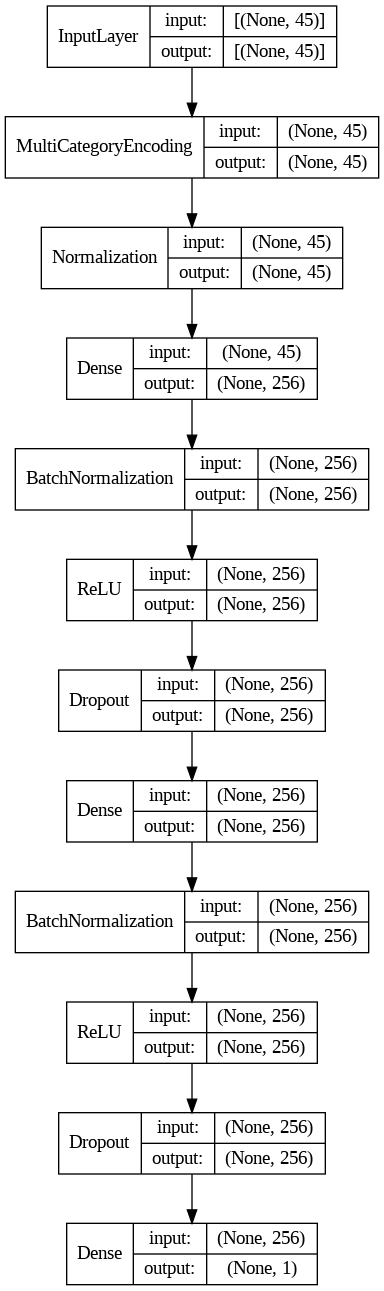

In [129]:
utils.plot_model(best_model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

Epoch 1/20
17/17 [==============================] - 5s 46ms/step - loss: 0.1161 - accuracy: 0.9021 - val_loss: 1.3615 - val_accuracy: 0.0000e+00
Epoch 2/20
17/17 [==============================] - 0s 10ms/step - loss: 0.0960 - accuracy: 0.9251 - val_loss: 0.8731 - val_accuracy: 0.0000e+00
Epoch 3/20
17/17 [==============================] - 0s 16ms/step - loss: 0.0921 - accuracy: 0.9136 - val_loss: 0.7440 - val_accuracy: 0.0345
Epoch 4/20
17/17 [==============================] - 0s 16ms/step - loss: 0.0878 - accuracy: 0.9213 - val_loss: 1.0999 - val_accuracy: 0.0000e+00
Epoch 5/20
17/17 [==============================] - 0s 16ms/step - loss: 0.0720 - accuracy: 0.9367 - val_loss: 0.7987 - val_accuracy: 0.0000e+00
Epoch 6/20
17/17 [==============================] - 0s 15ms/step - loss: 0.0645 - accuracy: 0.9386 - val_loss: 0.8603 - val_accuracy: 0.0000e+00
Epoch 7/20
17/17 [==============================] - 0s 16ms/step - loss: 0.0616 - accuracy: 0.9386 - val_loss: 0.9464 - val_accuracy: 

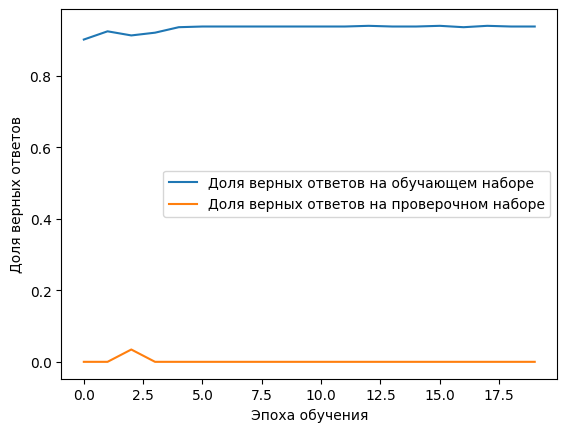

In [130]:
# дообучаем лучшую модель
history = best_model.fit(
    x_train_01,
    y_train,
    epochs=20,
    validation_split=0.1
)
plot_history(history)